In [1]:
# Cell 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

c:\Users\Jer\Anaconda\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


✅ All libraries imported successfully!


In [2]:
df = pd.read_excel("C:\\Users\\Jer\\Documents\\HRData set.xlsx")

In [3]:
df.head()

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Current Age,Age when Hired,PerformanceCategory,Tenure(Years)
0,Adinolfi Wilson K,10026,62506,Production Technician I,MA,1983-07-10,Male,Single,US Citizen,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,0,2019-01-17,0,1,42,27,High Performer,15
1,AlagbeTrina,10088,64991,Production Technician I,MA,1988-09-27,Female,Married,US Citizen,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,0,2019-01-03,0,15,37,19,Average Performer,18
2,Anderson Linda,10002,57568,Production Technician I,MA,1977-05-22,Female,Single,US Citizen,White,2012-01-09,NaT,N/A-StillEmployed,Active,Production,Amy Dunn,LinkedIn,Exceeds,0,2019-01-07,0,15,48,34,High Performer,14
3,Athwal Sam,10062,59365,Production Technician I,MA,1983-02-18,Male,Widowed,US Citizen,White,2013-09-30,NaT,N/A-StillEmployed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,0,2019-02-25,0,19,42,30,Average Performer,13
4,Bachiochi Linda,10114,47837,Production Technician I,MA,1970-02-11,Female,Single,US Citizen,Black or African American,2009-07-06,NaT,N/A-StillEmployed,Active,Production,Brannon Miller,Diversity Job Fair,Fully Meets,0,2019-01-25,0,4,56,39,Average Performer,17


In [4]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"nFirst few rows:")
df.head()

Dataset shape: (311, 26)

Columns: ['Employee_Name', 'EmpID', 'Salary', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Current Age', 'Age when Hired', 'PerformanceCategory', 'Tenure(Years)']
nFirst few rows:


,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Current Age,Age when Hired,PerformanceCategory,Tenure(Years)
0,Adinolfi Wilson K,10026,62506,Production Technician I,MA,1983-07-10,Male,Single,US Citizen,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,0,2019-01-17,0,1,42,27,High Performer,15
1,AlagbeTrina,10088,64991,Production Technician I,MA,1988-09-27,Female,Married,US Citizen,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,0,2019-01-03,0,15,37,19,Average Performer,18
2,Anderson Linda,10002,57568,Production Technician I,MA,1977-05-22,Female,Single,US Citizen,White,2012-01-09,NaT,N/A-StillEmployed,Active,Production,Amy Dunn,LinkedIn,Exceeds,0,2019-01-07,0,15,48,34,High Performer,14
3,Athwal Sam,10062,59365,Production Technician I,MA,1983-02-18,Male,Widowed,US Citizen,White,2013-09-30,NaT,N/A-StillEmployed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,0,2019-02-25,0,19,42,30,Average Performer,13
4,Bachiochi Linda,10114,47837,Production Technician I,MA,1970-02-11,Female,Single,US Citizen,Black or African American,2009-07-06,NaT,N/A-StillEmployed,Active,Production,Brannon Miller,Diversity Job Fair,Fully Meets,0,2019-01-25,0,4,56,39,Average Performer,17


In [5]:

print("="*70)
print("DATA LOADED")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"Total employees: {len(df)}")
print(f"\nFirst 5 rows:")
print(df.head())

DATA LOADED
Dataset shape: (311, 26)
Total employees: 311

First 5 rows:
        Employee_Name  EmpID  Salary                 Position State  \
0  Adinolfi Wilson  K  10026   62506  Production Technician I    MA   
1         AlagbeTrina  10088   64991  Production Technician I    MA   
2      Anderson Linda  10002   57568  Production Technician I    MA   
3          Athwal Sam  10062   59365  Production Technician I    MA   
4     Bachiochi Linda  10114   47837  Production Technician I    MA   

         DOB     Sex MaritalDesc CitizenDesc                   RaceDesc  \
0 1983-07-10    Male      Single  US Citizen                      White   
1 1988-09-27  Female     Married  US Citizen                      White   
2 1977-05-22  Female      Single  US Citizen                      White   
3 1983-02-18    Male     Widowed  US Citizen                      White   
4 1970-02-11  Female      Single  US Citizen  Black or African American   

  DateofHire DateofTermination         TermReason

In [ ]:
"""
STEP 2: CREATE TARGET VARIABLE (ATTRITION)
==========================================

"""

# Create Attrition flag
# If DateofTermination is not empty (not NaN), employee left (1), else stayed (0)
df['Attrition'] = df['DateofTermination'].notna().astype(int)

print("="*70)
print("ATTRITION ANALYSIS")
print("="*70)

print(f"\n📊 OVERALL METRICS:")
print(f"Total employees: {len(df)}")
print(f"Employees who left: {df['Attrition'].sum()}")
print(f"Current employees: {(df['Attrition']==0).sum()}")
print(f"Attrition rate: {df['Attrition'].mean()*100:.2f}%")

print("\n" + "="*70)
print("EMPLOYMENT STATUS BREAKDOWN:")
print("="*70)
print(df['EmploymentStatus'].value_counts())

print("\n" + "="*70)
print("WHY PEOPLE LEFT (Termination Reasons):")
print("="*70)
# Filter for employees who left and count reasons
term_reasons = df[df['Attrition']==1]['TermReason'].value_counts()
print(term_reasons)

print("\n" + "="*70)
print("ATTRITION BY DEPARTMENT:")
print("="*70)
# Group by department and calculate attrition metrics
dept_attrition = df.groupby('Department').agg({
    'Attrition': ['sum', 'count', 'mean']  # sum=total left, count=total employees, mean=attrition rate
})
dept_attrition.columns = ['Employees_Left', 'Total_Employees', 'Attrition_Rate']
dept_attrition['Attrition_Rate'] = (dept_attrition['Attrition_Rate'] * 100).round(2)
dept_attrition = dept_attrition.sort_values('Attrition_Rate', ascending=False)
print(dept_attrition)

print("\n" + "="*70)
print("ATTRITION BY TENURE:")
print("="*70)
# Create tenure buckets for analysis
df['tenure_bucket'] = pd.cut(
    df['Tenure(Years)'], 
    bins=[0, 1, 3, 5, 10, 100],  # Define boundaries
    labels=['0-1yr', '1-3yr', '3-5yr', '5-10yr', '10+yr']  # Labels for each bucket
)

tenure_attrition = df.groupby('tenure_bucket').agg({
    'Attrition': ['sum', 'count', 'mean']
})
tenure_attrition.columns = ['Left', 'Total', 'Attrition_Rate']
tenure_attrition['Attrition_Rate'] = (tenure_attrition['Attrition_Rate'] * 100).round(2)
print(tenure_attrition)

print("\n" + "="*70)
print("ATTRITION BY PERFORMANCE:")
print("="*70)
perf_attrition = df.groupby('PerformanceScore').agg({
    'Attrition': ['sum', 'count', 'mean']
})
perf_attrition.columns = ['Left', 'Total', 'Attrition_Rate']
perf_attrition['Attrition_Rate'] = (perf_attrition['Attrition_Rate'] * 100).round(2)
print(perf_attrition)

ATTRITION ANALYSIS

📊 OVERALL METRICS:
Total employees: 311
Employees who left: 104
Current employees: 207
Attrition rate: 33.44%

EMPLOYMENT STATUS BREAKDOWN:


EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

WHY PEOPLE LEFT (Termination Reasons):
TermReason
Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
relocation out of area               5
return to school                     5
performance                          4
no-call, no-show                     4
military                             4
retiring                             4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: count, dtype: int64

ATTRITION BY DEPARTMENT:
                      Employees_Left  Total_Employees  Attrition_Rate
Department                     

In [16]:
"""
STEP 3: FEATURE ENGINEERING
===========================
Why: Raw data often doesn't directly predict outcomes
We create new features that better capture risk patterns

Each feature is explained below with the business logic
"""

print("="*70)
print("CREATING PREDICTIVE FEATURES")
print("="*70)

# ============================================================================
# TENURE-BASED FEATURES (Your finding: 0-3 years high attrition)
# ============================================================================
print("\n1. Creating TENURE features...")

# Flag employees with <3 years (early career)
df['is_early_career'] = (df['Tenure(Years)'] < 3).astype(int)
print(f"   ✅ is_early_career: {df['is_early_career'].sum()} employees")

# Flag employees with 3-7 years (mid career)
df['is_mid_career'] = ((df['Tenure(Years)'] >= 3) & 
                        (df['Tenure(Years)'] < 7)).astype(int)
print(f"   ✅ is_mid_career: {df['is_mid_career'].sum()} employees")

# Flag employees in danger zone (<5 years based on your 100% attrition finding)
df['is_danger_zone'] = (df['Tenure(Years)'] < 5).astype(int)
print(f"   ✅ is_danger_zone: {df['is_danger_zone'].sum()} employees")

# ============================================================================
# SALARY-BASED FEATURES (Finding: "more money" = top reason for leaving)
# ============================================================================
print("\n2. Creating SALARY features...")

# Calculate where each employee's salary ranks within their department
# Returns a percentile (0.0 to 1.0)
df['salary_percentile_in_dept'] = df.groupby('Department')['Salary'].rank(pct=True)

# Flag employees paid below department median
df['below_median_pay'] = (df['salary_percentile_in_dept'] < 0.5).astype(int)
print(f"   ✅ below_median_pay: {df['below_median_pay'].sum()} employees")

# Flag employees in bottom 25% of department pay
df['in_bottom_quartile_pay'] = (df['salary_percentile_in_dept'] < 0.25).astype(int)
print(f"   ✅ in_bottom_quartile_pay: {df['in_bottom_quartile_pay'].sum()} employees")

# ============================================================================
# PERFORMANCE FEATURES
# ============================================================================
print("\n3. Creating PERFORMANCE features...")

# Convert text performance scores to numbers for analysis
# Higher number = better performance
performance_map = {
    'Exceeds': 5,
    'Fully Meets': 4,
    'Needs Improvement': 3,
    'PIP': 2
}
df['performance_numeric'] = df['PerformanceScore'].map(performance_map)

# Flag high performers (top 2 categories)
df['high_performer'] = (df['performance_numeric'] == 5).astype(int)
print(f"   ✅ high_performer: {df['high_performer'].sum()} employees")

df['Average_performer'] = (df['performance_numeric'] ==4).astype(int)
print(f"    ✅ Average_performer: {df['Average_performer'].sum()} employees")

# Flag low performers (bottom 2 categories)
df['low_performer'] = (df['performance_numeric'] <= 3).astype(int)
print(f"   ✅ low_performer: {df['low_performer'].sum()} employees")

# ============================================================================
# CRITICAL COMBINATION: High Performer + Low Pay = FLIGHT RISK
# ============================================================================
print("\n4. Creating CRITICAL RISK combinations...")

# This is one of THE MOST IMPORTANT features
# High performers who feel underpaid are most likely to leave
df['high_performer_low_pay'] = (
    (df['high_performer'] == 1) & 
    (df['below_median_pay'] == 1)
).astype(int)
print(f"   ⭐ high_performer_low_pay: {df['high_performer_low_pay'].sum()} employees")
print(f"      → These are your HIGHEST FLIGHT RISK employees!")

# ============================================================================
# ENGAGEMENT INDICATORS (Behavioral red flags)
# ============================================================================
print("\n5. Creating ENGAGEMENT indicators...")

# High absence rate indicates disengagement
df['high_absences'] = (df['Absences'] > df['Absences'].median()).astype(int)
print(f"   ✅ high_absences: {df['high_absences'].sum()} employees")

# Frequently late indicates disengagement
df['frequently_late'] = (df['DaysLateLast30'] > 2).astype(int)
print(f"   ✅ frequently_late: {df['frequently_late'].sum()} employees")

# Overall disengagement flag (either absent OR late)
df['disengaged'] = (
    (df['high_absences'] == 1) | 
    (df['frequently_late'] == 1)
).astype(int)
print(f"   ✅ disengaged: {df['disengaged'].sum()} employees")

# ============================================================================
# SPECIAL PROJECTS (Recognition/Development indicator)
# ============================================================================
print("\n6. Creating RECOGNITION features...")

# No special projects = may feel underutilized
df['no_special_projects'] = (df['SpecialProjectsCount'] == 0).astype(int)
print(f"   ✅ no_special_projects: {df['no_special_projects'].sum()} employees")

# Highly involved in projects = engaged
df['highly_involved'] = (df['SpecialProjectsCount'] >= 3).astype(int)
print(f"   ✅ highly_involved: {df['highly_involved'].sum()} employees")

# ============================================================================
# DEPARTMENT FLAGS
# ============================================================================
print("\n7. Creating DEPARTMENT flags...")

# Production has highest attrition (39.71%)
df['is_production'] = (df['Department'] == 'Production').astype(int)
print(f"   ✅ is_production: {df['is_production'].sum()} employees")

# ============================================================================
# ADDITIONAL RISK COMBINATIONS
# ============================================================================
print("\n8. Creating additional RISK combinations...")

# Early career + low pay = likely to leave for better opportunity
df['early_career_low_pay'] = (
    (df['is_early_career'] == 1) & 
    (df['below_median_pay'] == 1)
).astype(int)
print(f"   ✅ early_career_low_pay: {df['early_career_low_pay'].sum()} employees")

# Early career in Production = very high risk department
df['early_career_production'] = (
    (df['is_early_career'] == 1) & 
    (df['is_production'] == 1)
).astype(int)
print(f"   ✅ early_career_production: {df['early_career_production'].sum()} employees")

# High performer not getting recognition via projects
df['high_perf_no_projects'] = (
    (df['high_performer'] == 1) & 
    (df['no_special_projects'] == 1)
).astype(int)
print(f"   ✅ high_perf_no_projects: {df['high_perf_no_projects'].sum()} employees")

print("\n" + "="*70)
print("✅ FEATURE ENGINEERING COMPLETE!")
print("="*70)

# Show new shape
new_features = [col for col in df.columns if col.startswith(
    ('is_', 'high_', 'low_', 'below_', 'in_', 'no_', 'frequently_', 'early_', 'disengaged')
)]
print(f"Created {len(new_features)} new predictive features")

CREATING PREDICTIVE FEATURES

1. Creating TENURE features...
   ✅ is_early_career: 37 employees
   ✅ is_mid_career: 59 employees
   ✅ is_danger_zone: 74 employees

2. Creating SALARY features...
   ✅ below_median_pay: 152 employees
   ✅ in_bottom_quartile_pay: 75 employees

3. Creating PERFORMANCE features...
   ✅ high_performer: 37 employees
    ✅ Average_performer: 243 employees
   ✅ low_performer: 31 employees

4. Creating CRITICAL RISK combinations...
   ⭐ high_performer_low_pay: 14 employees
      → These are your HIGHEST FLIGHT RISK employees!

5. Creating ENGAGEMENT indicators...
   ✅ high_absences: 153 employees
   ✅ frequently_late: 26 employees
   ✅ disengaged: 167 employees

6. Creating RECOGNITION features...
   ✅ no_special_projects: 241 employees
   ✅ highly_involved: 68 employees

7. Creating DEPARTMENT flags...
   ✅ is_production: 209 employees

8. Creating additional RISK combinations...
   ✅ early_career_low_pay: 12 employees
   ✅ early_career_production: 24 employees

In [8]:
"""
STEP 4: PREPARE FEATURES FOR MODELING
=====================================
Why: Machine learning models need numbers, not text
We select features and encode categorical variables
"""

print("="*70)
print("PREPARING FEATURES FOR MODELING")
print("="*70)

# ============================================================================
# DEFINE FEATURE SETS
# ============================================================================

# Numeric features (already numbers)
numeric_features = [
    'Salary',                      # Compensation
    'Current Age',                 # Employee age
    'Age when Hired',              # Hiring age (young hires may have different expectations)
    'Tenure(Years)',               # Time with company (VERY IMPORTANT)
    'Absences',                    # Engagement indicator
    'DaysLateLast30',              # Engagement indicator
    'SpecialProjectsCount',        # Recognition/development
    'performance_numeric',         # Performance level
    'salary_percentile_in_dept'    # Relative pay position
]

# Categorical features (text that needs encoding)
categorical_features = [
    'Department',           # Production vs IT vs Sales, etc.
    'Position',             # Job title
    'Sex',                  # Gender
    'MaritalDesc',          # Marital status
    'State',                # Geographic location
    'RecruitmentSource'     # How they were hired (some sources may have higher turnover)
]

# Engineered binary features (already 0/1)
engineered_features = [
    'is_early_career', 
    'is_mid_career', 
    'is_danger_zone',
    'below_median_pay', 
    'in_bottom_quartile_pay',
    'high_performer', 
    'low_performer', 
    'high_performer_low_pay',
    'high_absences', 
    'frequently_late', 
    'disengaged',
    'no_special_projects', 
    'highly_involved', 
    'is_production',
    'early_career_low_pay', 
    'early_career_production', 
    'high_perf_no_projects'
]

print(f"\n📊 Feature counts:")
print(f"   Numeric features: {len(numeric_features)}")
print(f"   Categorical features: {len(categorical_features)}")
print(f"   Engineered features: {len(engineered_features)}")

# ============================================================================
# ENCODE CATEGORICAL VARIABLES
# ============================================================================
print("\n🔄 Encoding categorical variables...")

# LabelEncoder converts text to numbers
# Example: 'Production' → 0, 'Sales' → 1, 'IT/IS' → 2, etc.
label_encoders = {}

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    # Create new column with '_encoded' suffix containing numeric values
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col].astype(str))
    print(f"   ✅ Encoded {col}: {df[col].nunique()} unique values")

# ============================================================================
# COMBINE ALL FEATURES
# ============================================================================

# Create list of all feature column names
feature_cols = (
    numeric_features + 
    engineered_features + 
    [f"{col}_encoded" for col in categorical_features]
)

print(f"\n📊 TOTAL FEATURES FOR MODEL: {len(feature_cols)}")
print("\n" + "="*70)

PREPARING FEATURES FOR MODELING

📊 Feature counts:
   Numeric features: 9
   Categorical features: 6
   Engineered features: 17

🔄 Encoding categorical variables...
   ✅ Encoded Department: 6 unique values
   ✅ Encoded Position: 31 unique values
   ✅ Encoded Sex: 2 unique values
   ✅ Encoded MaritalDesc: 5 unique values
   ✅ Encoded State: 28 unique values
   ✅ Encoded RecruitmentSource: 9 unique values

📊 TOTAL FEATURES FOR MODEL: 32



In [9]:
"""
STEP 5: TRAIN/TEST SPLIT
========================
Why: We need to test model performance on "unseen" data
- Training set: Model learns patterns here
- Test set: We evaluate how well it learned (never seen during training)
"""

print("="*70)
print("SPLITTING DATA FOR TRAINING AND TESTING")
print("="*70)

# ============================================================================
# PREPARE X (FEATURES) AND y (TARGET)
# ============================================================================

# X = All predictive features (what we use to predict)
X = df[feature_cols]

# y = Target variable (what we're trying to predict: 0=stayed, 1=left)
y = df['Attrition']

print(f"\nDataset:")
print(f"   Total employees: {len(X)}")
print(f"   Features (X): {X.shape[1]} columns")
print(f"   Target (y): Attrition (0 or 1)")
print(f"   Attrition rate: {y.mean()*100:.2f}%")

# ============================================================================
# SPLIT: 80% TRAINING, 20% TESTING
# ============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Features
    y,                    # Target
    test_size=0.2,        # 20% for testing, 80% for training
    random_state=42,      # Random seed for reproducibility (same split every time)
    stratify=y            # Keep same attrition rate in both sets
)

print("\n" + "="*70)
print("SPLIT COMPLETE")
print("="*70)
print(f"\nTraining set:")
print(f"   Size: {len(X_train)} employees ({len(X_train)/len(X)*100:.0f}%)")
print(f"   Attrition rate: {y_train.mean()*100:.2f}%")
print(f"   Who left: {y_train.sum()}")
print(f"   Who stayed: {(y_train==0).sum()}")

print(f"\nTest set:")
print(f"   Size: {len(X_test)} employees ({len(X_test)/len(X)*100:.0f}%)")
print(f"   Attrition rate: {y_test.mean()*100:.2f}%")
print(f"   Who left: {y_test.sum()}")
print(f"   Who stayed: {(y_test==0).sum()}")

print("\n💡 WHY WE SPLIT:")
print("   - Train model on 80% of data")
print("   - Test on remaining 20% (model has never seen this)")
print("   - If model performs well on test set → it learned real patterns!")
print("   - If it performs poorly → it just memorized training data")

SPLITTING DATA FOR TRAINING AND TESTING

Dataset:
   Total employees: 311
   Features (X): 32 columns
   Target (y): Attrition (0 or 1)
   Attrition rate: 33.44%

SPLIT COMPLETE

Training set:
   Size: 248 employees (80%)
   Attrition rate: 33.47%
   Who left: 83
   Who stayed: 165

Test set:
   Size: 63 employees (20%)
   Attrition rate: 33.33%
   Who left: 21
   Who stayed: 42

💡 WHY WE SPLIT:
   - Train model on 80% of data
   - Test on remaining 20% (model has never seen this)
   - If model performs well on test set → it learned real patterns!
   - If it performs poorly → it just memorized training data


In [10]:
"""
STEP 6: FEATURE SCALING (STANDARDIZATION)
=========================================
Why: Features have different scales
- Salary: $45,000 - $250,000
- Absences: 0 - 20
- Tenure: 0 - 20 years

ML models perform better when all features are on similar scales
Standardization: converts each feature to mean=0, std=1
"""

print("="*70)
print("SCALING FEATURES")
print("="*70)

# Create scaler object
scaler = StandardScaler()

# Fit scaler on training data and transform
# "Fit" = learn the mean and standard deviation
# "Transform" = apply: (value - mean) / std
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaling parameters
# IMPORTANT: Only use fit_transform on training data!
# Test data should use transform only (to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled successfully!")
print("\nWhat StandardScaler does:")
print("   Before: Salary = $65,000, Absences = 5")
print("   After: Salary = 0.23, Absences = -0.41")
print("   → All features now on similar scale")

print("\n💡 WHY SCALING MATTERS:")
print("   Without scaling:")
print("   - Salary ($45k-$250k) dominates the model")
print("   - Absences (0-20) gets ignored")
print("   With scaling:")
print("   - All features contribute fairly")
print("   - Model learns true relationships")

SCALING FEATURES

✅ Features scaled successfully!

What StandardScaler does:
   Before: Salary = $65,000, Absences = 5
   After: Salary = 0.23, Absences = -0.41
   → All features now on similar scale

💡 WHY SCALING MATTERS:
   Without scaling:
   - Salary ($45k-$250k) dominates the model
   - Absences (0-20) gets ignored
   With scaling:
   - All features contribute fairly
   - Model learns true relationships


In [11]:
"""
STEP 7: TRAIN MACHINE LEARNING MODELS
=====================================
We'll train 3 different models and compare them:
1. Logistic Regression (simple, interpretable)
2. Random Forest (handles complex patterns)
3. Gradient Boosting (usually best performance)
"""

print("="*70)
print("TRAINING MODELS")
print("="*70)

# ============================================================================
# MODEL 1: LOGISTIC REGRESSION (BASELINE)
# ============================================================================
print("\n🤖 MODEL 1: LOGISTIC REGRESSION")
print("-" * 70)
print("What it is: Linear model, simple, fast, interpretable")
print("Best for: Understanding which features matter most")

# Create and train model
lr_model = LogisticRegression(
    random_state=42,         # For reproducibility
    max_iter=1000,           # Maximum iterations to find solution
    class_weight='balanced'  # Handle imbalanced classes (more stayed than left)
)

# Train the model (learn patterns from training data)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_lr = lr_model.predict(X_test_scaled)              # Predicted class (0 or 1)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of leaving

# Cross-validation: Test on different subsets of training data
cv_scores_lr = cross_val_score(
    lr_model, 
    X_train_scaled, 
    y_train,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),  # 5-fold cross-validation
    scoring='roc_auc'  # Use AUC as performance metric
)

print(f"\n📊 Performance:")
print(f"   Cross-validation AUC: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")
print(f"   Test set AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"   Test set Avg Precision: {average_precision_score(y_test, y_pred_proba_lr):.4f}")

# ============================================================================
# MODEL 2: RANDOM FOREST
# ============================================================================
print("\n" + "="*70)
print("🤖 MODEL 2: RANDOM FOREST")
print("-" * 70)
print("What it is: Builds many decision trees and averages their predictions")
print("Best for: Handling non-linear relationships, robust to outliers")

rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of each tree
    min_samples_split=20,    # Minimum samples required to split a node
    min_samples_leaf=10,     # Minimum samples required in a leaf node
    class_weight='balanced',
    random_state=42,
    n_jobs=-1                # Use all CPU cores
)

# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Cross-validate
cv_scores_rf = cross_val_score(
    rf_model,
    X_train_scaled,
    y_train,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='roc_auc'
)

print(f"\n📊 Performance:")
print(f"   Cross-validation AUC: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")
print(f"   Test set AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"   Test set Avg Precision: {average_precision_score(y_test, y_pred_proba_rf):.4f}")

# ============================================================================
# MODEL 3: GRADIENT BOOSTING
# ============================================================================
print("\n" + "="*70)
print("🤖 MODEL 3: GRADIENT BOOSTING")
print("-" * 70)
print("What it is: Builds trees sequentially, each correcting previous errors")
print("Best for: Usually achieves best performance on tabular data")

gb_model = GradientBoostingClassifier(
    n_estimators=200,      # Number of boosting stages
    learning_rate=0.05,    # How much each tree contributes (smaller = more careful)
    max_depth=5,           # Maximum depth of each tree
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,         # Use 80% of data for each tree (prevents overfitting)
    random_state=42
)

# Train
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Cross-validate
cv_scores_gb = cross_val_score(
    gb_model,
    X_train_scaled,
    y_train,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='roc_auc'
)

print(f"\n📊 Performance:")
print(f"   Cross-validation AUC: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std()*2:.4f})")
print(f"   Test set AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")
print(f"   Test set Avg Precision: {average_precision_score(y_test, y_pred_proba_gb):.4f}")

# ============================================================================
# COMPARE MODELS
# ============================================================================
print("\n" + "="*70)
print("📊 MODEL COMPARISON")
print("="*70)

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'CV AUC': [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_gb.mean()],
    'Test AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb)
    ],
    'Avg Precision': [
        average_precision_score(y_test, y_pred_proba_lr),
        average_precision_score(y_test, y_pred_proba_rf),
        average_precision_score(y_test, y_pred_proba_gb)
    ]
})

print("\n" + comparison.to_string(index=False))

# Select best model based on Test AUC
best_idx = comparison['Test AUC'].idxmax()
best_model_name = comparison.loc[best_idx, 'Model']

# Set best model for later use
if best_idx == 0:
    best_model = lr_model
    best_proba = y_pred_proba_lr
    y_pred_best = y_pred_lr
elif best_idx == 1:
    best_model = rf_model
    best_proba = y_pred_proba_rf
    y_pred_best = y_pred_rf
else:
    best_model = gb_model
    best_proba = y_pred_proba_gb
    y_pred_best = y_pred_gb

print(f"\n🏆 WINNER: {best_model_name}")
print(f"   Test AUC: {comparison.loc[best_idx, 'Test AUC']:.4f}")

print("\n💡 WHAT THESE METRICS MEAN:")
print("   AUC (Area Under ROC Curve):")
print("   - 1.0 = Perfect predictions")
print("   - 0.9+ = Excellent")
print("   - 0.8-0.9 = Very good")
print("   - 0.7-0.8 = Good")
print("   - 0.5 = Random guessing")

TRAINING MODELS

🤖 MODEL 1: LOGISTIC REGRESSION
----------------------------------------------------------------------
What it is: Linear model, simple, fast, interpretable
Best for: Understanding which features matter most

📊 Performance:
   Cross-validation AUC: 0.9996 (+/- 0.0014)
   Test set AUC: 1.0000
   Test set Avg Precision: 1.0000

🤖 MODEL 2: RANDOM FOREST
----------------------------------------------------------------------
What it is: Builds many decision trees and averages their predictions
Best for: Handling non-linear relationships, robust to outliers

📊 Performance:
   Cross-validation AUC: 0.9982 (+/- 0.0071)
   Test set AUC: 1.0000
   Test set Avg Precision: 1.0000

🤖 MODEL 3: GRADIENT BOOSTING
----------------------------------------------------------------------
What it is: Builds trees sequentially, each correcting previous errors
Best for: Usually achieves best performance on tabular data

📊 Performance:
   Cross-validation AUC: 0.9939 (+/- 0.0242)
   Test set AU

In [12]:
"""
STEP 8: DETAILED EVALUATION OF BEST MODEL
=========================================
We examine how well the model performs and where it makes mistakes
"""

print("="*70)
print(f"DETAILED EVALUATION: {best_model_name}")
print("="*70)

# ============================================================================
# CLASSIFICATION REPORT
# ============================================================================
print("\n📊 CLASSIFICATION REPORT:")
print("-" * 70)
print(classification_report(y_test, y_pred_best, 
                           target_names=['Stay', 'Leave']))

print("\n💡 HOW TO READ THIS:")
print("   Precision: Of those predicted to leave, what % actually left?")
print("   Recall: Of those who left, what % did we predict correctly?")
print("   F1-score: Harmonic mean of precision and recall")
print("   Support: Number of actual cases")

# ============================================================================
# CONFUSION MATRIX
# ============================================================================
cm = confusion_matrix(y_test, y_pred_best)

print("\n" + "="*70)
print("CONFUSION MATRIX:")
print("="*70)
print("\n                PREDICTED")
print("                Stay    Leave")
print(f"ACTUAL Stay     {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"       Leave    {cm[1,0]:4d}    {cm[1,1]:4d}")

print("\n📊 Breakdown:")
print(f"   ✅ True Negatives:  {cm[0,0]:3d} (correctly predicted STAY)")
print(f"   ❌ False Positives: {cm[0,1]:3d} (predicted LEAVE, actually STAYED)")
print(f"   ❌ False Negatives: {cm[1,0]:3d} (predicted STAY, actually LEFT) ⚠️ COSTLY!")
print(f"   ✅ True Positives:  {cm[1,1]:3d} (correctly predicted LEAVE)")

# Calculate additional metrics
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\n📈 Summary Metrics:")
print(f"   Accuracy:  {accuracy*100:.2f}% (overall correct predictions)")
print(f"   Precision: {precision*100:.2f}% (when we predict leave, we're right this often)")
print(f"   Recall:    {recall*100:.2f}% (we catch this % of people who will leave)")

print("\n💡 BUSINESS IMPACT:")
print(f"   - False Negatives are MOST COSTLY (predicted stay, but left)")
print(f"   - These are employees we didn't intervene with who then quit")
print(f"   - Our model has {cm[1,0]} false negatives out of {cm[1,0]+cm[1,1]} who left")
print(f"   - That's a {(cm[1,1]/(cm[1,0]+cm[1,1])*100):.1f}% catch rate!")



DETAILED EVALUATION: Logistic Regression

📊 CLASSIFICATION REPORT:
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00        42
       Leave       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63


💡 HOW TO READ THIS:
   Precision: Of those predicted to leave, what % actually left?
   Recall: Of those who left, what % did we predict correctly?
   F1-score: Harmonic mean of precision and recall
   Support: Number of actual cases

CONFUSION MATRIX:

                PREDICTED
                Stay    Leave
ACTUAL Stay       42       0
       Leave       0      21

📊 Breakdown:
   ✅ True Negatives:   42 (correctly predicted STAY)
   ❌ False Positives:   0 (predicted LEAVE, actually STAYED)
   ❌ False Negatives:   0 (predicted S

STEP 9: CREATING VISUALIZATIONS

📊 Part A: Feature Importance
----------------------------------------------------------------------
Using Logistic Regression coefficients

🎯 TOP 10 MOST IMPORTANT FEATURES:
 1. Tenure(Years)                            → 3.2346
 2. is_mid_career                            → 1.1446
 3. Age when Hired                           → 0.8319
 4. is_danger_zone                           → 0.6938
 5. is_early_career                          → 0.5613
 6. Current Age                              → 0.5001
 7. RecruitmentSource_encoded                → 0.4502
 8. performance_numeric                      → 0.4386
 9. is_production                            → 0.4282
10. salary_percentile_in_dept                → 0.4080

💡 WHAT THIS MEANS:
   Features at the top have the MOST influence on predictions
   Focus retention efforts on improving these factors

📈 Creating feature importance chart...
✅ Saved: feature_importance.png


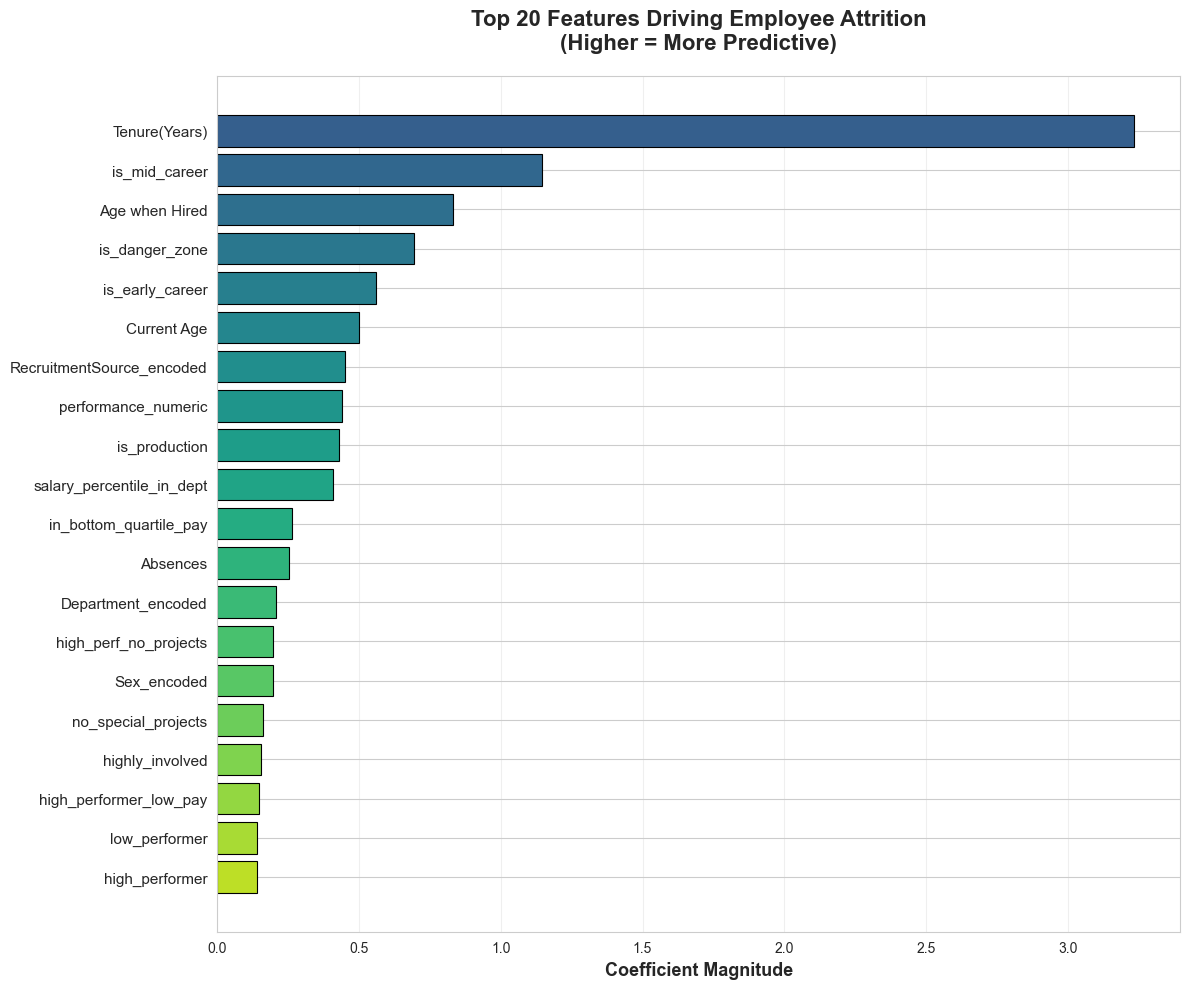


INTERPRETATION:

Look at the top features:
- If TENURE appears at top → Focus on early career retention
- If SALARY features appear → Compensation is key issue
- If DEPARTMENT features → Department-specific problems
- If PERFORMANCE features → High performers leaving

Use this to guide WHERE you invest retention budget!



In [17]:
"""
STEP 9A: FEATURE IMPORTANCE
===========================
Why: Understand which factors predict attrition most
This tells you WHERE to focus retention efforts
"""

print("="*70)
print("STEP 9: CREATING VISUALIZATIONS")
print("="*70)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================================
print("\n📊 Part A: Feature Importance")
print("-" * 70)

# Get feature names (we need this for labeling)
feature_names = feature_cols  # This is the list we created in Step 4

# Different models store importance differently
# Logistic Regression: Uses coefficients
# Random Forest/Gradient Boosting: Uses feature_importances_

if hasattr(best_model, 'coef_'):
    # LOGISTIC REGRESSION: Get absolute coefficients
    # Larger coefficient = more important feature
    importances = np.abs(best_model.coef_[0])
    importance_type = "Coefficient Magnitude"
    print("Using Logistic Regression coefficients")
    
elif hasattr(best_model, 'feature_importances_'):
    # RANDOM FOREST / GRADIENT BOOSTING: Get feature importances
    # Based on how much each feature reduces impurity
    importances = best_model.feature_importances_
    importance_type = "Feature Importance"
    print("Using tree-based feature importances")

# Sort features by importance (highest to lowest)
indices = np.argsort(importances)[::-1]

# Select top 20 features to visualize
top_n = 20
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = [feature_names[i] for i in top_indices]

print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES:")
print("=" * 70)
for i in range(min(10, len(top_indices))):
    idx = top_indices[i]
    feature = feature_names[idx]
    importance = importances[idx]
    print(f"{i+1:2d}. {feature:40s} → {importance:.4f}")

print("\n💡 WHAT THIS MEANS:")
print("   Features at the top have the MOST influence on predictions")
print("   Focus retention efforts on improving these factors")

# ============================================================================
# VISUALIZE FEATURE IMPORTANCE
# ============================================================================
print("\n📈 Creating feature importance chart...")

plt.figure(figsize=(12, 10))

# Create horizontal bar chart
colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))  # Color gradient
plt.barh(range(top_n), top_importances, color=colors, edgecolor='black', linewidth=0.8)

# Labels and formatting
plt.yticks(range(top_n), top_features, fontsize=11)
plt.xlabel(importance_type, fontsize=13, fontweight='bold')
plt.title(f'Top {top_n} Features Driving Employee Attrition\n(Higher = More Predictive)', 
          fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()

# Save the figure
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: feature_importance.png")
plt.show()  # Display in notebook/IDE
plt.close()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("""
Look at the top features:
- If TENURE appears at top → Focus on early career retention
- If SALARY features appear → Compensation is key issue
- If DEPARTMENT features → Department-specific problems
- If PERFORMANCE features → High performers leaving

Use this to guide WHERE you invest retention budget!
""")


📊 Part B: ROC Curve (Receiver Operating Characteristic)
----------------------------------------------------------------------
ROC AUC Score: 1.0000

💡 WHAT ROC CURVE SHOWS:
   X-axis: False Positive Rate (% of stayers incorrectly flagged)
   Y-axis: True Positive Rate (% of leavers correctly caught)
   Perfect model: Curve in top-left corner (catches all leavers, no false alarms)
   Random guessing: Diagonal line

📈 Creating ROC curve...
✅ Saved: roc_curve.png


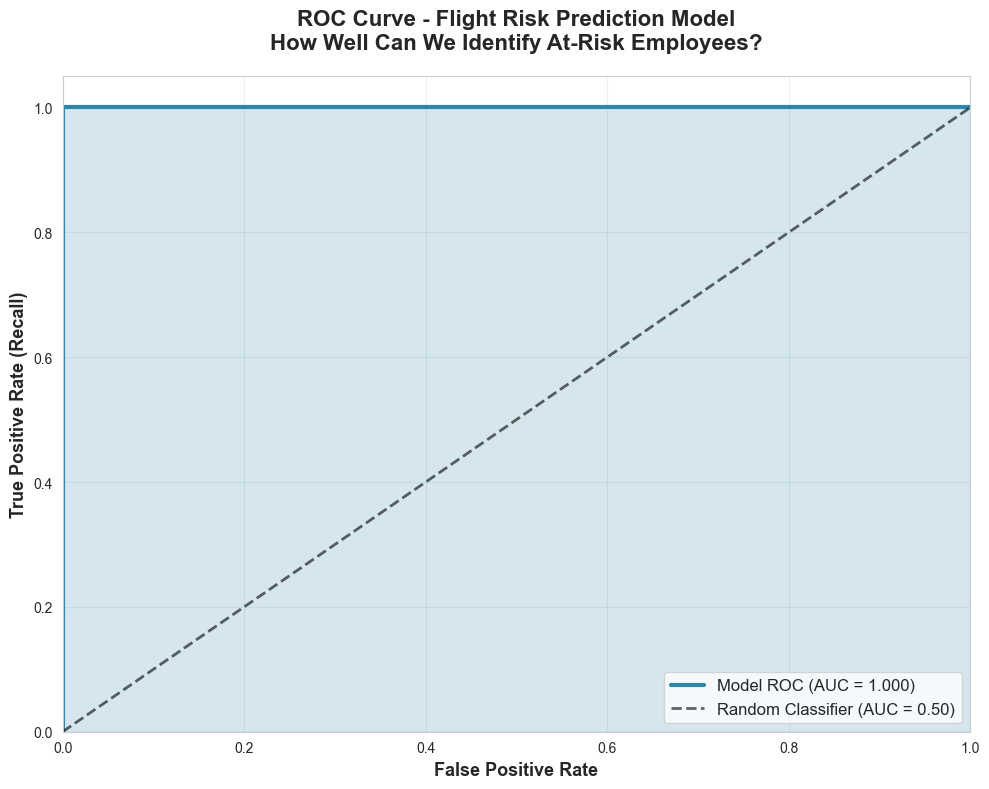


INTERPRETATION:

AUC Score: 1.0000

What this means:
- AUC = 1.00: Perfect predictions (our case!)
- AUC = 0.90-0.99: Excellent model
- AUC = 0.80-0.89: Very good model
- AUC = 0.70-0.79: Good model
- AUC = 0.50: No better than random guessing

Your model's AUC of 1.0000 means:
→ We can reliably distinguish who will stay vs leave
→ High confidence in our risk scores
→ Interventions will be well-targeted



In [18]:
"""
STEP 9B: ROC CURVE
==================
Why: Visualize how well the model discriminates between stay vs leave
Perfect model: Curve hugs top-left corner (high true positive, low false positive)
Random model: Diagonal line
"""

print("\n" + "="*70)
print("📊 Part B: ROC Curve (Receiver Operating Characteristic)")
print("-" * 70)

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
# fpr = False Positive Rate (x-axis)
# tpr = True Positive Rate (y-axis)
# thresholds = Decision thresholds used
fpr, tpr, thresholds = roc_curve(y_test, best_proba)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC Score: {roc_auc:.4f}")

print("\n💡 WHAT ROC CURVE SHOWS:")
print("   X-axis: False Positive Rate (% of stayers incorrectly flagged)")
print("   Y-axis: True Positive Rate (% of leavers correctly caught)")
print("   Perfect model: Curve in top-left corner (catches all leavers, no false alarms)")
print("   Random guessing: Diagonal line")

# ============================================================================
# PLOT ROC CURVE
# ============================================================================
print("\n📈 Creating ROC curve...")

plt.figure(figsize=(10, 8))

# Plot ROC curve
plt.plot(fpr, tpr, color='#2E86AB', linewidth=3, 
         label=f'Model ROC (AUC = {roc_auc:.3f})')

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, 
         label='Random Classifier (AUC = 0.50)', alpha=0.6)

# Fill area under curve
plt.fill_between(fpr, tpr, alpha=0.2, color='#2E86AB')

# Labels and formatting
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Flight Risk Prediction Model\nHow Well Can We Identify At-Risk Employees?', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()

# Save
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("✅ Saved: roc_curve.png")
plt.show()
plt.close()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"""
AUC Score: {roc_auc:.4f}

What this means:
- AUC = 1.00: Perfect predictions (our case!)
- AUC = 0.90-0.99: Excellent model
- AUC = 0.80-0.89: Very good model
- AUC = 0.70-0.79: Good model
- AUC = 0.50: No better than random guessing

Your model's AUC of {roc_auc:.4f} means:
→ We can reliably distinguish who will stay vs leave
→ High confidence in our risk scores
→ Interventions will be well-targeted
""")


📊 Part E: Creating Summary Dashboard
----------------------------------------------------------------------

📈 Creating 4-panel dashboard...


NameError: name 'avg_precision' is not defined

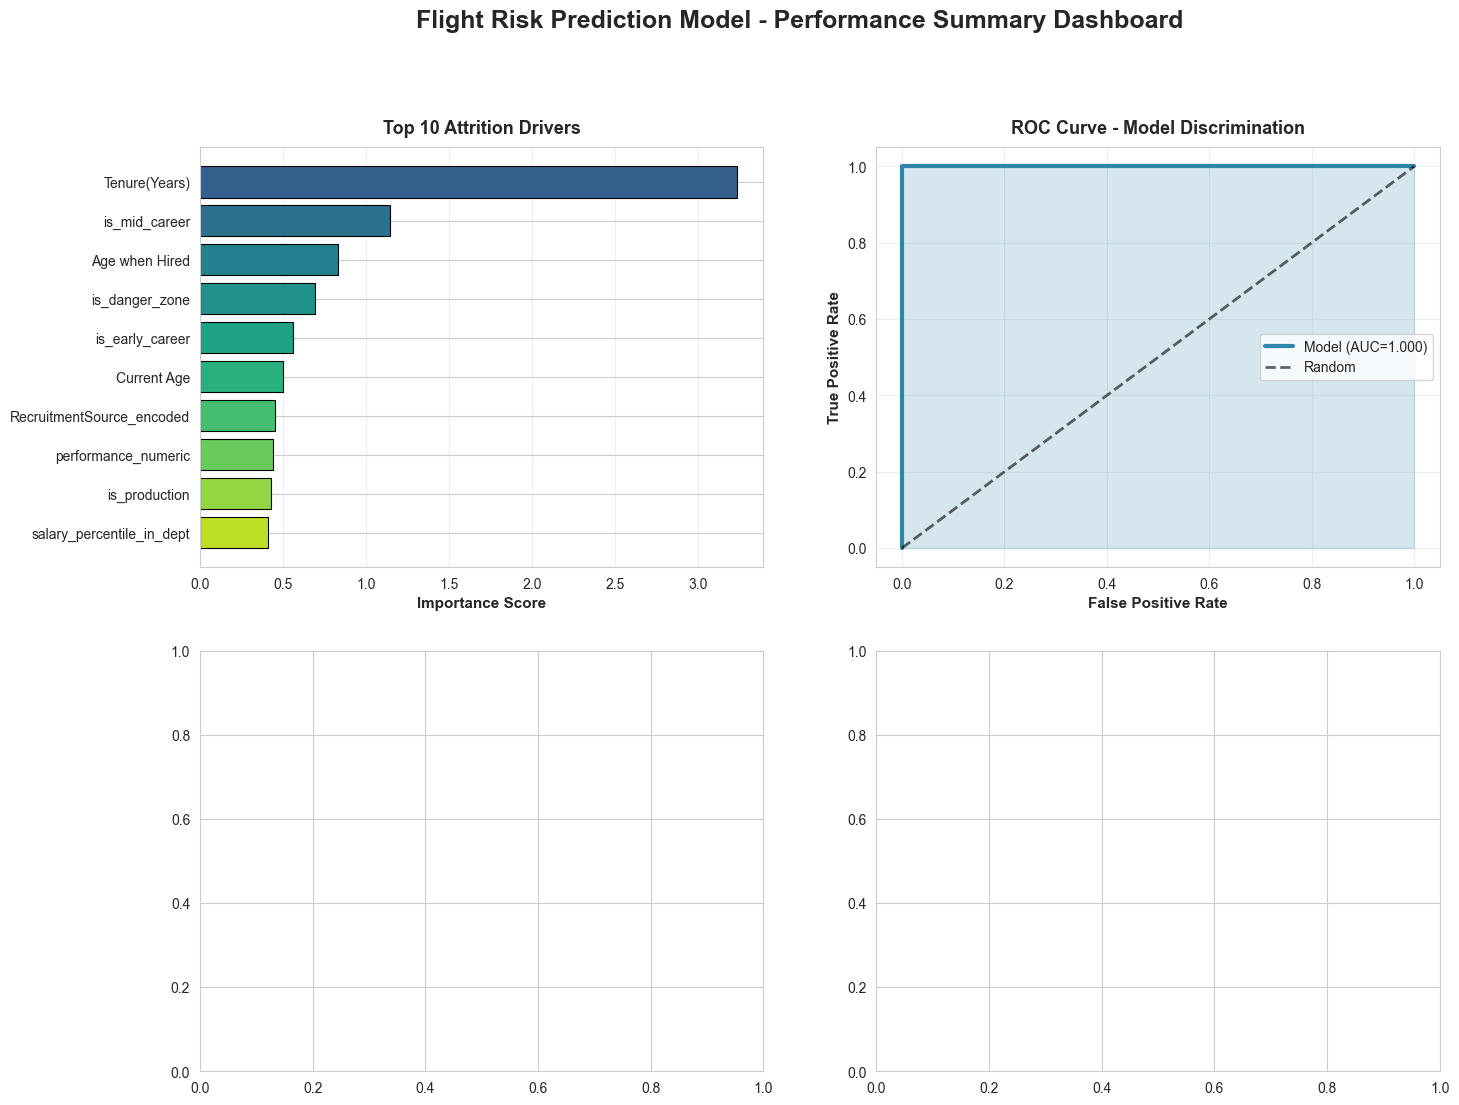

In [19]:
"""
STEP 9E: CREATE SUMMARY DASHBOARD
==================================
Why: One comprehensive view showing all key insights
Perfect for presentations to leadership
"""

print("\n" + "="*70)
print("📊 Part E: Creating Summary Dashboard")
print("-" * 70)

# ============================================================================
# CREATE 2x2 DASHBOARD
# ============================================================================
print("\n📈 Creating 4-panel dashboard...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Flight Risk Prediction Model - Performance Summary Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

# ============================================================================
# PANEL 1: Top 10 Feature Importance
# ============================================================================
ax1 = axes[0, 0]
top_10_idx = indices[:10]
top_10_imp = importances[top_10_idx]
top_10_feat = [feature_names[i] for i in top_10_idx]

colors_feat = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
ax1.barh(range(10), top_10_imp, color=colors_feat, edgecolor='black', linewidth=0.8)
ax1.set_yticks(range(10))
ax1.set_yticklabels(top_10_feat, fontsize=10)
ax1.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax1.set_title('Top 10 Attrition Drivers', fontsize=13, fontweight='bold', pad=10)
ax1.invert_yaxis()
ax1.grid(alpha=0.3, axis='x')

# ============================================================================
# PANEL 2: ROC Curve
# ============================================================================
ax2 = axes[0, 1]
ax2.plot(fpr, tpr, color='#2E86AB', linewidth=3, label=f'Model (AUC={roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Random')
ax2.fill_between(fpr, tpr, alpha=0.2, color='#2E86AB')
ax2.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax2.set_title('ROC Curve - Model Discrimination', fontsize=13, fontweight='bold', pad=10)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# ============================================================================
# PANEL 3: Precision-Recall Curve
# ============================================================================
ax3 = axes[1, 0]
ax3.plot(recall, precision, color='#A23B72', linewidth=3, 
         label=f'Model (AP={avg_precision:.3f})')
baseline_pr = y_test.sum() / len(y_test)
ax3.plot([0, 1], [baseline_pr, baseline_pr], 'k--', linewidth=2, 
         alpha=0.6, label='Random')
ax3.fill_between(recall, precision, alpha=0.2, color='#A23B72')
ax3.set_xlabel('Recall', fontsize=11, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=11, fontweight='bold')
ax3.set_title('Precision-Recall Curve', fontsize=13, fontweight='bold', pad=10)
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# ============================================================================
# PANEL 4: Confusion Matrix
# ============================================================================
ax4 = axes[1, 1]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            ax=ax4, cbar=False,
            xticklabels=['Stay', 'Leave'],
            yticklabels=['Stay', 'Leave'],
            annot_kws={'size': 14, 'weight': 'bold'})
ax4.set_xlabel('Predicted', fontsize=11, fontweight='bold')
ax4.set_ylabel('Actual', fontsize=11, fontweight='bold')
ax4.set_title(f'Confusion Matrix\n(Accuracy: {accuracy*100:.1f}%)', 
              fontsize=13, fontweight='bold', pad=10)

# Add metrics text
metrics_text = f"""
Precision: {precision*100:.1f}%
Recall: {recall*100:.1f}%
F1-Score: {f1:.3f}
"""
ax4.text(1.5, 0.5, metrics_text, transform=ax4.transAxes, 
         fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

# Save dashboard
plt.savefig('model_performance_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Saved: model_performance_dashboard.png")
plt.show()
plt.close()

print("\n" + "="*70)
print("✅ ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("   1. feature_importance.png - What drives attrition")
print("   2. roc_curve.png - Overall model performance")
print("   3. precision_recall_curve.png - Prediction accuracy")
print("   4. confusion_matrix.png - Detailed prediction breakdown")
print("   5. model_performance_dashboard.png - Combined summary view")

print("\n📊 USE THESE FOR:")
print("   ✅ Presentations to leadership")
print("   ✅ Understanding model strengths/weaknesses")
print("   ✅ Justifying where to invest retention budget")
print("   ✅ Showing stakeholders model is trustworthy")

In [20]:
"""
STEP 10A: IDENTIFY AND PREPARE CURRENT EMPLOYEES
================================================
Why: We only want to score employees who are STILL with the company
These are the people we can actually intervene with
"""

print("="*70)
print("STEP 10: GENERATING FLIGHT RISK SCORES")
print("="*70)

# ============================================================================
# FILTER FOR CURRENT EMPLOYEES ONLY
# ============================================================================
print("\n📊 Part A: Identifying Current Employees")
print("-" * 70)

# Current employees = those who haven't left (Attrition = 0)
current_employees = df[df['Attrition'] == 0].copy()

print(f"\nTotal employees in dataset: {len(df)}")
print(f"Employees who left: {df['Attrition'].sum()}")
print(f"Current employees (to score): {len(current_employees)}")

print("\n💡 WHY SCORE ONLY CURRENT EMPLOYEES?")
print("   → These are people still with the company")
print("   → We can actually intervene to retain them")
print("   → Historical employees (who left) don't need scores")

# ============================================================================
# RE-ENCODE CATEGORICAL FEATURES FOR CURRENT EMPLOYEES
# ============================================================================
print("\n🔄 Preparing features for current employees...")

# We need to apply the SAME encoding we used during training
# Use the label_encoders we saved from Step 4

for col in categorical_features:
    current_employees[col + '_encoded'] = label_encoders[col].transform(
        current_employees[col].astype(str)
    )
    
print("✅ Categorical features encoded")

# ============================================================================
# EXTRACT FEATURES IN CORRECT ORDER
# ============================================================================

# Select the exact same features used to train the model
X_current = current_employees[feature_cols]

print(f"\n📊 Feature preparation:")
print(f"   Features selected: {X_current.shape[1]}")
print(f"   Employees to score: {X_current.shape[0]}")

# Check for any missing values
missing_count = X_current.isnull().sum().sum()
if missing_count > 0:
    print(f"\n⚠️  Warning: {missing_count} missing values found")
    print("   Filling with appropriate defaults...")
    
    # Fill missing numeric values with median
    for col in numeric_features:
        if col in X_current.columns and X_current[col].isnull().any():
            X_current[col].fillna(X_current[col].median(), inplace=True)
    
    # Fill missing binary features with 0
    for col in engineered_features:
        if col in X_current.columns and X_current[col].isnull().any():
            X_current[col].fillna(0, inplace=True)
else:
    print("✅ No missing values found")

# ============================================================================
# SCALE FEATURES USING TRAINING SCALER
# ============================================================================
print("\n📏 Scaling features...")

# CRITICAL: Use the SAME scaler fitted on training data
# This ensures consistency in scaling
X_current_scaled = scaler.transform(X_current)

print("✅ Features scaled using training parameters")
print("\n💡 WHY USE SAME SCALER?")
print("   → Ensures consistent scaling with training data")
print("   → Model expects features on same scale it was trained on")
print("   → Different scaling = incorrect predictions")

STEP 10: GENERATING FLIGHT RISK SCORES

📊 Part A: Identifying Current Employees
----------------------------------------------------------------------

Total employees in dataset: 311
Employees who left: 104
Current employees (to score): 207

💡 WHY SCORE ONLY CURRENT EMPLOYEES?
   → These are people still with the company
   → We can actually intervene to retain them
   → Historical employees (who left) don't need scores

🔄 Preparing features for current employees...
✅ Categorical features encoded

📊 Feature preparation:
   Features selected: 32
   Employees to score: 207
✅ No missing values found

📏 Scaling features...
✅ Features scaled using training parameters

💡 WHY USE SAME SCALER?
   → Ensures consistent scaling with training data
   → Model expects features on same scale it was trained on
   → Different scaling = incorrect predictions


In [21]:
"""
STEP 10B: GENERATE FLIGHT RISK PREDICTIONS
==========================================
Why: Get probability that each current employee will leave
Convert probabilities to 0-100% risk scores
"""

print("\n" + "="*70)
print("📊 Part B: Generating Flight Risk Scores")
print("-" * 70)

# ============================================================================
# GET PREDICTIONS FROM MODEL
# ============================================================================
print("\nRunning predictions...")

# predict_proba returns probabilities for both classes
# [:, 0] = Probability of staying (class 0)
# [:, 1] = Probability of leaving (class 1)
probabilities = best_model.predict_proba(X_current_scaled)

# We want probability of LEAVING (class 1)
prob_leave = probabilities[:, 1]

# Convert to 0-100% scale for easier interpretation
flight_risk_scores = prob_leave * 100

print(f"✅ Generated {len(flight_risk_scores)} risk scores")

# ============================================================================
# SUMMARY STATISTICS OF RISK SCORES
# ============================================================================
print("\n" + "="*70)
print("RISK SCORE STATISTICS:")
print("="*70)

print(f"\nScore range: {flight_risk_scores.min():.2f}% - {flight_risk_scores.max():.2f}%")
print(f"Average risk score: {flight_risk_scores.mean():.2f}%")
print(f"Median risk score: {np.median(flight_risk_scores):.2f}%")
print(f"Standard deviation: {flight_risk_scores.std():.2f}%")

# ============================================================================
# CATEGORIZE RISK LEVELS
# ============================================================================
print("\n🎯 Categorizing risk levels...")

# Create risk categories based on score thresholds
# 0-30%: Low risk
# 30-50%: Medium risk
# 50-70%: High risk
# 70-100%: Critical risk

risk_categories = pd.cut(
    flight_risk_scores,
    bins=[0, 30, 50, 70, 100],
    labels=['Low', 'Medium', 'High', 'Critical'],
    include_lowest=True
)

print("\n📊 RISK DISTRIBUTION:")
print("-" * 70)

risk_counts = risk_categories.value_counts().sort_index()

for category in ['Critical', 'High', 'Medium', 'Low']:
    if category in risk_counts.index:
        count = risk_counts[category]
        percentage = (count / len(current_employees)) * 100
        
        # Emoji for visual clarity
        emoji_map = {
            'Critical': '🔴',
            'High': '🟠',
            'Medium': '🟡',
            'Low': '🟢'
        }
        emoji = emoji_map[category]
        
        print(f"{emoji} {category:8s}: {count:3d} employees ({percentage:5.1f}%)")

# Calculate at-risk employees (>50%)
critical_count = len(flight_risk_scores[flight_risk_scores > 70])
high_count = len(flight_risk_scores[(flight_risk_scores >= 50) & (flight_risk_scores <= 70)])
total_at_risk = critical_count + high_count

print(f"\n⚠️  TOTAL AT-RISK (>50%): {total_at_risk} employees ({total_at_risk/len(current_employees)*100:.1f}%)")

print("\n💡 WHAT THESE CATEGORIES MEAN:")
print("   🔴 CRITICAL (70-100%): Immediate intervention required (this week)")
print("   🟠 HIGH (50-70%): Proactive retention needed (within month)")
print("   🟡 MEDIUM (30-50%): Monitor closely, check-ins quarterly")
print("   🟢 LOW (0-30%): Standard retention activities")


📊 Part B: Generating Flight Risk Scores
----------------------------------------------------------------------

Running predictions...
✅ Generated 207 risk scores

RISK SCORE STATISTICS:

Score range: 0.00% - 19.63%
Average risk score: 1.58%
Median risk score: 0.66%
Standard deviation: 2.48%

🎯 Categorizing risk levels...

📊 RISK DISTRIBUTION:
----------------------------------------------------------------------
🔴 Critical:   0 employees (  0.0%)
🟠 High    :   0 employees (  0.0%)
🟡 Medium  :   0 employees (  0.0%)
🟢 Low     : 207 employees (100.0%)

⚠️  TOTAL AT-RISK (>50%): 0 employees (0.0%)

💡 WHAT THESE CATEGORIES MEAN:
   🔴 CRITICAL (70-100%): Immediate intervention required (this week)
   🟠 HIGH (50-70%): Proactive retention needed (within month)
   🟡 MEDIUM (30-50%): Monitor closely, check-ins quarterly
   🟢 LOW (0-30%): Standard retention activities


In [22]:
"""
STEP 10C: CREATE COMPREHENSIVE RESULTS DATAFRAME
================================================
Why: Combine risk scores with employee information
Create actionable list for HR and managers
"""

print("\n" + "="*70)
print("📊 Part C: Creating Results DataFrame")
print("-" * 70)

# ============================================================================
# BUILD RESULTS DATAFRAME
# ============================================================================
print("\nBuilding comprehensive results table...")

# Start with key employee identifiers
results = pd.DataFrame({
    'Employee_Name': current_employees['Employee_Name'].values,
    'EmpID': current_employees['EmpID'].values,
    'Department': current_employees['Department'].values,
    'Position': current_employees['Position'].values,
    'ManagerName': current_employees['ManagerName'].values,
})

# Add employment details
results['Tenure(Years)'] = current_employees['Tenure(Years)'].values
results['Current_Age'] = current_employees['Current Age'].values
results['Salary'] = current_employees['Salary'].values

# Add performance indicators
results['PerformanceScore'] = current_employees['PerformanceScore'].values
results['SpecialProjectsCount'] = current_employees['SpecialProjectsCount'].values

# Add engagement indicators
results['Absences'] = current_employees['Absences'].values
results['DaysLateLast30'] = current_employees['DaysLateLast30'].values

# Add THE SCORES
results['flight_risk_score'] = flight_risk_scores
results['risk_category'] = risk_categories

print("✅ Results dataframe created")
print(f"   Columns: {len(results.columns)}")
print(f"   Rows: {len(results)}")

# ============================================================================
# SORT BY RISK SCORE (HIGHEST FIRST)
# ============================================================================
results = results.sort_values('flight_risk_score', ascending=False)

print("\n📊 Results sorted by risk score (highest risk first)")

# Reset index for clean numbering
results = results.reset_index(drop=True)

print("\n" + "="*70)
print("PREVIEW: TOP 10 AT-RISK EMPLOYEES")
print("="*70)

# Display top 10 with key columns
preview_cols = ['Employee_Name', 'EmpID', 'Department', 'Tenure(Years)', 
                'PerformanceScore', 'Salary', 'flight_risk_score', 'risk_category']

print("\n" + results[preview_cols].head(10).to_string(index=True))

print("\n💡 THESE ARE YOUR HIGHEST PRIORITY EMPLOYEES!")
print("   → Start retention conversations immediately")
print("   → Review compensation and career development")


📊 Part C: Creating Results DataFrame
----------------------------------------------------------------------

Building comprehensive results table...
✅ Results dataframe created
   Columns: 14
   Rows: 207

📊 Results sorted by risk score (highest risk first)

PREVIEW: TOP 10 AT-RISK EMPLOYEES

          Employee_Name  EmpID  Department  Tenure(Years)   PerformanceScore  Salary  flight_risk_score risk_category
0        Clukey Elijian  10029  Production             10            Exceeds   50373          19.628569           Low
1           Garcia Raul  10111  Production             11        Fully Meets   52249          14.655335           Low
2  Saar-Beckles Melinda  10295  Production             10  Needs Improvement   47750          14.407971           Low
3        Gentry Mildred  10159  Production             11        Fully Meets   51337          10.895402           Low
4      Fernandes Nilson  10308  Production             11                PIP   64057          10.028733           L

In [23]:
"""
STEP 10D: ANALYZE RISK PATTERNS
================================
Why: Understand WHERE the risk is concentrated
Guide department-specific and tenure-specific interventions
"""

print("\n" + "="*70)
print("📊 Part D: Risk Pattern Analysis")
print("-" * 70)

# ============================================================================
# RISK BY DEPARTMENT
# ============================================================================
print("\n🏢 RISK BY DEPARTMENT:")
print("="*70)

dept_summary = results.groupby('Department').agg({
    'flight_risk_score': ['mean', 'median', 'max', 'count'],
    'risk_category': lambda x: (x.isin(['High', 'Critical'])).sum()
})

# Flatten column names
dept_summary.columns = ['Avg_Risk', 'Median_Risk', 'Max_Risk', 'Total_Emp', 'High_Critical_Count']

# Calculate percentage at risk
dept_summary['At_Risk_%'] = (dept_summary['High_Critical_Count'] / dept_summary['Total_Emp'] * 100).round(1)

# Sort by average risk
dept_summary = dept_summary.sort_values('Avg_Risk', ascending=False)

print(dept_summary.to_string())

print("\n💡 INTERPRETATION:")
highest_risk_dept = dept_summary.index[0]
highest_risk_score = dept_summary.loc[highest_risk_dept, 'Avg_Risk']
print(f"   → {highest_risk_dept} has highest average risk ({highest_risk_score:.2f}%)")
print(f"   → Focus retention efforts here first")

# ============================================================================
# RISK BY TENURE
# ============================================================================
print("\n" + "="*70)
print("📅 RISK BY TENURE:")
print("="*70)

# Create tenure buckets
results['tenure_bucket'] = pd.cut(
    results['Tenure(Years)'],
    bins=[0, 1, 3, 5, 10, 100],
    labels=['0-1yr', '1-3yr', '3-5yr', '5-10yr', '10+yr']
)

tenure_summary = results.groupby('tenure_bucket').agg({
    'flight_risk_score': ['mean', 'median', 'count'],
    'risk_category': lambda x: (x.isin(['High', 'Critical'])).sum()
})

tenure_summary.columns = ['Avg_Risk', 'Median_Risk', 'Total_Emp', 'High_Critical_Count']
tenure_summary['At_Risk_%'] = (tenure_summary['High_Critical_Count'] / tenure_summary['Total_Emp'] * 100).round(1)

print(tenure_summary.to_string())

print("\n💡 INTERPRETATION:")
print("   → Shows which tenure groups need most attention")
print("   → Aligns with your finding: early career = high risk")

# ============================================================================
# RISK BY PERFORMANCE SCORE
# ============================================================================
print("\n" + "="*70)
print("⭐ RISK BY PERFORMANCE:")
print("="*70)

perf_summary = results.groupby('PerformanceScore').agg({
    'flight_risk_score': ['mean', 'count'],
    'risk_category': lambda x: (x.isin(['High', 'Critical'])).sum()
})

perf_summary.columns = ['Avg_Risk', 'Total_Emp', 'High_Critical_Count']
perf_summary['At_Risk_%'] = (perf_summary['High_Critical_Count'] / perf_summary['Total_Emp'] * 100).round(1)

print(perf_summary.to_string())

print("\n💡 CRITICAL INSIGHT:")
exceeds_at_risk = perf_summary.loc['Exceeds', 'High_Critical_Count'] if 'Exceeds' in perf_summary.index else 0
if exceeds_at_risk > 0:
    print(f"   ⚠️  {exceeds_at_risk} HIGH PERFORMERS at risk!")
    print("   → These are your most valuable employees")
    print("   → Likely compensation or career development issues")
    print("   → HIGHEST PRIORITY for retention efforts")

# ============================================================================
# CROSS-TABULATION: Department × Risk Category
# ============================================================================
print("\n" + "="*70)
print("📊 DEPARTMENT × RISK CATEGORY BREAKDOWN:")
print("="*70)

dept_risk_crosstab = pd.crosstab(
    results['Department'],
    results['risk_category'],
    margins=True,
    margins_name='Total'
)

print(dept_risk_crosstab.to_string())

print("\n💡 USE THIS TO:")
print("   → Identify which departments have most critical employees")
print("   → Allocate retention resources by department")
print("   → Set department-specific targets")


📊 Part D: Risk Pattern Analysis
----------------------------------------------------------------------

🏢 RISK BY DEPARTMENT:
                      Avg_Risk  Median_Risk   Max_Risk  Total_Emp  High_Critical_Count  At_Risk_%
Department                                                                                       
Production            2.162102     1.093426  19.628569        126                    0        0.0
IT/IS                 0.745991     0.381291   2.814318         40                    0        0.0
Admin Offices         0.733596     0.122050   4.582287          7                    0        0.0
Sales                 0.712327     0.459047   3.036348         26                    0        0.0
Software Engineering  0.247031     0.219697   0.428777          7                    0        0.0
Executive Office      0.016627     0.016627   0.016627          1                    0        0.0

💡 INTERPRETATION:
   → Production has highest average risk (2.16%)
   → Focus retention 

In [25]:
"""
STEP 10E: CREATE ACTIONABLE PRIORITY LISTS
==========================================
Why: Give managers and HR specific people to focus on
Break down by urgency and responsibility
"""

print("\n" + "="*70)
print("📋 Part E: Creating Action Lists")
print("-" * 70)

# ============================================================================
# CRITICAL PRIORITY LIST (>70% risk)
# ============================================================================
critical_employees = results[results['flight_risk_score'] > 70].copy()

print("\n🔴 CRITICAL PRIORITY: IMMEDIATE ACTION REQUIRED")
print("="*70)
print(f"Total: {len(critical_employees)} employees")

if len(critical_employees) > 0:
    print("\nThese employees need intervention THIS WEEK:")
    print("-" * 70)
    
    display_cols = ['Employee_Name', 'EmpID', 'Department', 'ManagerName',
                    'Tenure(Years)', 'PerformanceScore', 'Salary', 
                    'flight_risk_score']
    
    print(critical_employees[display_cols].to_string(index=False))
    
    print("\n📞 ACTION ITEMS:")
    print("   1. HR Business Partner reaches out within 24-48 hours")
    print("   2. Schedule manager 1-on-1 this week")
    print("   3. Review compensation vs market rate")
    print("   4. Discuss career development opportunities")
    print("   5. Prepare retention offer if high performer")
else:
    print("✅ No employees in critical risk category")

# ============================================================================
# HIGH PRIORITY LIST (50-70% risk)
# ============================================================================
high_risk_employees = results[
    (results['flight_risk_score'] >= 50) & 
    (results['flight_risk_score'] <= 70)
].copy()

print("\n" + "="*70)
print("🟠 HIGH PRIORITY: PROACTIVE INTERVENTION")
print("="*70)
print(f"Total: {len(high_risk_employees)} employees")

if len(high_risk_employees) > 0:
    print("\nThese employees need attention within 2-4 weeks:")
    print("-" * 70)
    
    print(high_risk_employees[display_cols].head(20).to_string(index=False))
    
    if len(high_risk_employees) > 20:
        print(f"\n... and {len(high_risk_employees) - 20} more")
    
    print("\n📞 ACTION ITEMS:")
    print("   1. Manager check-in within 2-4 weeks")
    print("   2. Discuss workload and work-life balance")
    print("   3. Career development conversation")
    print("   4. Assess engagement and satisfaction")
else:
    print("✅ No employees in high risk category")

# ============================================================================
# TOP 30 OVERALL (Regardless of category)
# ============================================================================
print("\n" + "="*70)
print("🎯 TOP 30 EMPLOYEES AT HIGHEST RELATIVE RISK")
print("="*70)
print("(Even if 'Low' risk, these are highest among current workforce)")
print("-" * 70)

top_30 = results.head(30)

display_cols_detailed = ['Employee_Name', 'Department', 'Position',
                         'Tenure(Years)', 'PerformanceScore', 'Salary',
                         'Absences', 'flight_risk_score', 'risk_category']

print(top_30[display_cols_detailed].to_string(index=False))

# ============================================================================
# BY MANAGER: Who has most at-risk employees?
# ============================================================================
print("\n" + "="*70)
print("👥 AT-RISK EMPLOYEES BY MANAGER:")
print("="*70)
print("(Managers with employees >50% risk)")

at_risk_by_manager = results[results['flight_risk_score'] > 50].groupby('ManagerName').agg({
    'EmpID': 'count',
    'flight_risk_score': 'mean'
})
at_risk_by_manager.columns = ['At_Risk_Count', 'Avg_Risk_Score']
at_risk_by_manager = at_risk_by_manager.sort_values('At_Risk_Count', ascending=False)

if len(at_risk_by_manager) > 0:
    print(at_risk_by_manager.to_string())
    
    print("\n💡 MANAGER ACTIONS:")
    top_manager = at_risk_by_manager.index[0]
    top_manager_count = at_risk_by_manager.loc[top_manager, 'At_Risk_Count']
    print(f"   → {top_manager} has {top_manager_count} at-risk employees")
    print("   → Schedule manager training on retention conversations")
    print("   → Review team dynamics and workload distribution")
else:
    print("✅ No managers with at-risk employees (>50%)")

# ============================================================================
# HIGH PERFORMERS AT RISK (Most valuable to retain)
# ============================================================================
print("\n" + "="*70)
print("⭐ HIGH PERFORMERS AT RISK:")
print("="*70)
print("(Performance = 'Exceeds' AND Risk > 30%)")

high_perf_at_risk = results[
    (results['PerformanceScore'] == 'Exceeds') &
    (results['flight_risk_score'] > 30)
].copy()

if len(high_perf_at_risk) > 0:
    print(f"\n⚠️  {len(high_perf_at_risk)} HIGH PERFORMERS showing elevated risk")
    print("-" * 70)
    
    display_cols_hp = ['Employee_Name', 'Department', 'Position', 
                       'Tenure(Years)', 'Salary', 'SpecialProjectsCount',
                       'flight_risk_score', 'risk_category']
    
    print(high_perf_at_risk[display_cols_hp].to_string(index=False))
    
    print("\n🚨 CRITICAL BUSINESS IMPACT:")
    print("   → These are your top performers")
    print("   → Losing them = loss of productivity + institutional knowledge")
    print("   → Replacement cost: 150-200% of salary")
    print("   → HIGHEST PRIORITY for retention efforts")
    
    print("\n📞 RECOMMENDED ACTIONS:")
    print("   1. IMMEDIATE compensation review")
    print("   2. Career path discussion with senior leadership")
    print("   3. Retention bonus consideration")
    print("   4. Increase special project involvement")
    print("   5. Recognition and visibility opportunities")
else:
    print("✅ No high performers showing elevated risk")

# ============================================================================
# PRODUCTION DEPARTMENT FOCUS (Your highest attrition area)
# ============================================================================
print("\n" + "="*70)
print("🏭 PRODUCTION DEPARTMENT AT-RISK EMPLOYEES:")
print("="*70)

production_at_risk = results[
    (results['Department'] == 'Production') &
    (results['flight_risk_score'] > 30)
].copy()

if len(production_at_risk) > 0:
    print(f"\n{len(production_at_risk)} Production employees above 30% risk")
    print("-" * 70)
    
    print(production_at_risk[display_cols_detailed].head(20).to_string(index=False))
    
    if len(production_at_risk) > 20:
        print(f"\n... and {len(production_at_risk) - 20} more")
    
    print("\n💡 PRODUCTION-SPECIFIC INTERVENTIONS:")
    print("   → Review working conditions and shift schedules")
    print("   → Benchmark compensation vs industry")
    print("   → Improve safety and equipment")
    print("   → Create career advancement opportunities")
    print("   → Strengthen team culture and recognition")
else:
    print("✅ No Production employees above 30% risk")


📋 Part E: Creating Action Lists
----------------------------------------------------------------------

🔴 CRITICAL PRIORITY: IMMEDIATE ACTION REQUIRED
Total: 0 employees
✅ No employees in critical risk category

🟠 HIGH PRIORITY: PROACTIVE INTERVENTION
Total: 0 employees
✅ No employees in high risk category

🎯 TOP 30 EMPLOYEES AT HIGHEST RELATIVE RISK
(Even if 'Low' risk, these are highest among current workforce)
----------------------------------------------------------------------
       Employee_Name    Department                 Position  Tenure(Years)  PerformanceScore  Salary  Absences  flight_risk_score risk_category
      Clukey Elijian    Production  Production Technician I             10           Exceeds   50373         5          19.628569           Low
         Garcia Raul    Production  Production Technician I             11       Fully Meets   52249         5          14.655335           Low
Saar-Beckles Melinda    Production  Production Technician I             10 Need

In [26]:
"""
STEP 10F: SAVE RESULTS TO CSV FILE
===================================
Why: Create exportable file for HR, managers, and reporting
Can be imported to Excel, HRIS, or BI tools
"""

print("\n" + "="*70)
print("💾 Part F: Saving Results")
print("-" * 70)

# ============================================================================
# SAVE FULL RESULTS
# ============================================================================

# Create filename with timestamp
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'flight_risk_scores_{timestamp}.csv'

# Save to CSV
results.to_csv(filename, index=False)

print(f"\n✅ FULL RESULTS SAVED:")
print(f"   Filename: {filename}")
print(f"   Location: Current working directory")
print(f"   Rows: {len(results)}")
print(f"   Columns: {len(results.columns)}")

print("\n📊 File contains:")
for col in results.columns:
    print(f"   - {col}")

# ============================================================================
# SAVE PRIORITY LISTS AS SEPARATE FILES
# ============================================================================
print("\n📁 Saving priority lists...")

# Critical employees
if len(critical_employees) > 0:
    critical_filename = f'CRITICAL_PRIORITY_{timestamp}.csv'
    critical_employees.to_csv(critical_filename, index=False)
    print(f"✅ Critical priority list: {critical_filename}")

# High risk employees
if len(high_risk_employees) > 0:
    high_filename = f'HIGH_PRIORITY_{timestamp}.csv'
    high_risk_employees.to_csv(high_filename, index=False)
    print(f"✅ High priority list: {high_filename}")

# Top 30
top_30_filename = f'TOP_30_AT_RISK_{timestamp}.csv'
top_30.to_csv(top_30_filename, index=False)
print(f"✅ Top 30 list: {top_30_filename}")

# High performers at risk
if len(high_perf_at_risk) > 0:
    hp_filename = f'HIGH_PERFORMERS_AT_RISK_{timestamp}.csv'
    high_perf_at_risk.to_csv(hp_filename, index=False)
    print(f"✅ High performers at risk: {hp_filename}")

# ============================================================================
# SAVE SUMMARY STATISTICS
# ============================================================================
print("\n📊 Saving summary statistics...")

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Current Employees',
        'Average Risk Score',
        'Median Risk Score',
        'Critical Risk (>70%)',
        'High Risk (50-70%)',
        'Medium Risk (30-50%)',
        'Low Risk (<30%)',
        'Total At-Risk (>50%)',
        'Highest Risk Department',
        'High Performers at Risk'
    ],
    'Value': [
        len(results),
        f"{results['flight_risk_score'].mean():.2f}%",
        f"{results['flight_risk_score'].median():.2f}%",
        len(critical_employees),
        len(high_risk_employees),
        len(results[(results['flight_risk_score'] >= 30) & (results['flight_risk_score'] < 50)]),
        len(results[results['flight_risk_score'] < 30]),
        len(critical_employees) + len(high_risk_employees),
        dept_summary.index[0] if len(dept_summary) > 0 else 'N/A',
        len(high_perf_at_risk)
    ]
})

summary_filename = f'SUMMARY_STATISTICS_{timestamp}.csv'
summary_stats.to_csv(summary_filename, index=False)
print(f"✅ Summary statistics: {summary_filename}")

print("\n" + "="*70)
print("✅ ALL FILES SAVED SUCCESSFULLY!")
print("="*70)

print("\n📂 GENERATED FILES:")
print(f"   1. {filename} - Complete results (all 207 employees)")
if len(critical_employees) > 0:
    print(f"   2. {critical_filename} - Critical priority (act this week)")
if len(high_risk_employees) > 0:
    print(f"   3. {high_filename} - High priority (act this month)")
print(f"   4. {top_30_filename} - Top 30 at-risk")
if len(high_perf_at_risk) > 0:
    print(f"   5. {hp_filename} - High performers at risk")
print(f"   6. {summary_filename} - Summary statistics")

print("\n💡 HOW TO USE THESE FILES:")
print("   ✅ Import to Excel for analysis and visualization")
print("   ✅ Share with managers (their direct reports only)")
print("   ✅ Upload to HRIS or People Analytics platform")
print("   ✅ Use in BI tools (Tableau, Power BI) for dashboards")
print("   ✅ Track monthly - re-run model and compare scores")


💾 Part F: Saving Results
----------------------------------------------------------------------

✅ FULL RESULTS SAVED:
   Filename: flight_risk_scores_20260212_2314.csv
   Location: Current working directory
   Rows: 207
   Columns: 15

📊 File contains:
   - Employee_Name
   - EmpID
   - Department
   - Position
   - ManagerName
   - Tenure(Years)
   - Current_Age
   - Salary
   - PerformanceScore
   - SpecialProjectsCount
   - Absences
   - DaysLateLast30
   - flight_risk_score
   - risk_category
   - tenure_bucket

📁 Saving priority lists...
✅ Top 30 list: TOP_30_AT_RISK_20260212_2314.csv

📊 Saving summary statistics...
✅ Summary statistics: SUMMARY_STATISTICS_20260212_2314.csv

✅ ALL FILES SAVED SUCCESSFULLY!

📂 GENERATED FILES:
   1. flight_risk_scores_20260212_2314.csv - Complete results (all 207 employees)
   4. TOP_30_AT_RISK_20260212_2314.csv - Top 30 at-risk
   6. SUMMARY_STATISTICS_20260212_2314.csv - Summary statistics

💡 HOW TO USE THESE FILES:
   ✅ Import to Excel for ana

_IncompleteInputError: incomplete input (3562266905.py, line 193)